## **Functions basics tutorial**
### Types of functions in python
### How to define a function
### How to call a function
### Pass arguments to a function
### Return values and collect them

## **Depth of function args**
### Default argument
### Expected types of arguments
### Unknown no. of args
### Unknown number of keyword args
### Lambda functions

## **Different uses of a function**
### Namespaces to explain scope and function name/variable name
### Scope of variable
### Function within function
### Family of functions
### Decorators




### **Types of functions**
Functions can be built-in, imported or user defined
Eg. of built in, imported and user defined

In [1]:
# User defined
def func():
  print('Hello')

func()

Hello


In [2]:
#Built-in functions

var1 = -15
abs(var1)

15

In [3]:
# User defined with arguments

def user_function1(var1):
    x = var1 + 10
    return x

var1 = 6
var2 = user_function1(var1)
print(var2)

16


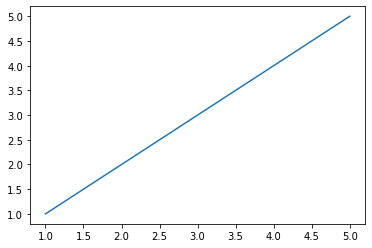

In [4]:
# Import function from a python library
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [1,2,3,4,5]

plt.plot(x,y)

### **How to define a function, pass arguments and collect output**

In [5]:
# No argument function

def func():
  print('I take no inputs')

#Calling a function
func()

I take no inputs


In [6]:
# Function with argument

def func(a):
  print('I take input a :',a)

# Pass argument while calling the function

a = 10
func(a)

I take input a : 10


In [7]:
# Function with argument and return

def func(a,b):
  print('I take inputs a: ',a,' and b: ',b)
  return a+b

# Pass arguments while calling the function and collect return value 

a=10
b=7
add = func(a,b)

I take inputs a:  10  and b:  7


### **Calling functions within a function and default values of arguments**

In [8]:
# Let's say we define a function that returns squared value of input
def square(a):
  return a**2

# We want to write a function that calculates hypotenuse value
# We can call the previous function within our new function

def hypotenuse(a,b):
  hypo = (square(a) + square(b))**0.5
  return hypo

# Call hypotenuse function
a = 6
b = 8

c = hypotenuse(a,b)

In [9]:
# Setting default value of arguments

def hypotenuse(a,b=8):
  hypo = (square(a) + square(b))**0.5
  return hypo

# Now when calling hypotenuse function you can pass one or two arguments
# When only given one argument it will assume default value for the other

a = 6
c = hypotenuse(a)
print(c)
# When given two values it will not take the default value for b
# Rather it will take the user provided value

a = 9
b = 12
c = hypotenuse(a,b)
print(c)

10.0
15.0


### **Argument type, abstract args and keyword args**

You can specify expected argument type, but it won't be enforced. In order to enforce add a block which captures the typeerror

In [10]:
# Mention argument type and expected return type
def arg_func(a: int) -> int:
    x = a + 10
    return x

# Passing a float does not throw error
var1 = 6.5
var2 = arg_func(var1)
print (var2)

16.5


Arbitrary Arguments, *args

In [11]:
# Used when number of inputs are not known
def my_function(*kids):
  print("The youngest child is " + kids[-1])

my_function("Emil", "Tobias", "Linus")

# Pass it as * and treat it like a tuple in the function
def average(*numbers):
  return sum(numbers)/len(numbers)

print('average for 1,2,3: ',average(1,2,3),' average for 1,10,33,43,2: ',average(1,10,33,43,2))

The youngest child is Linus
average for 1,2,3:  2.0  average for 1,10,33,43,2:  17.8


Arbitrary Keyword Arguments, **kwargs

In [12]:
# Used when number of inputs not known but a specific keyword is expected

def my_function(**kid):
  print("His last name is " + kid["lname"])

my_function(fname = "Tobias", lname = "Refsnes")

His last name is Refsnes


### **Lambda functions**

In [13]:
# Define lambda function
square = lambda x : x**2

# Call lambda function
print(square(2))

4


In [14]:
## Usage of lambda functions

#Example of Map function(calculate discount)
a = list(map(lambda x: x - 0.2*x, [120,300,150,3000,42.55,67.11]))

#Example of Filter function(get all 'back' positions)
b = list(filter(lambda x: 'B' in x, ['LB', 'CB', 'ST','CAM','CMD','GK','RB']))

print(a)
print(b)

[96.0, 240.0, 120.0, 2400.0, 34.04, 53.688]
['LB', 'CB', 'RB']


In [15]:
# Example of sorted function
lst = [('De Ligt',19,92.1), ('Alexander-Arnold',20,90.5), ('Sancho',19,94.0),('Havertz',20,93.2),('Rodrygo',18,91.4)]
lst.sort(key=lambda x:x[1])
print(lst)

[('Rodrygo', 18, 91.4), ('De Ligt', 19, 92.1), ('Sancho', 19, 94.0), ('Alexander-Arnold', 20, 90.5), ('Havertz', 20, 93.2)]


### **Scope of variables in functions**

In [16]:
# Testing the scope of a variable 'x'

def my_func():
    x = 10
    print("Value inside function:",x)

x = 20
print("Value before calling function:",x)
my_func()
print("Value after calling function:",x)

Value before calling function: 20
Value inside function: 10
Value after calling function: 20


### **Declaring fn within fn, returning a function, function as input argument**

You can define families of functions easily

In [17]:
# return a function
def multiplier(n):
  func = lambda x:x*n
  return func

doubler = multiplier(2)
tripler = multiplier(3)

print(doubler(20))
print(tripler(20))

40
60


In [18]:
# Taking a function as input
# Definging a function inside a function
# Returning a function

def sum_of_func(f):
  def sum(x,y):
    return f(x)+f(y)
  return sum

# Defining function that is supposed to ge as input
square = lambda x: x**2

# Collecting function that is returned
sum = sum_of_func(square)

# Calling the returned function
sum(2,3)

13

In [19]:
# Doing the same thing using decorator

# Note: sum gets overwritten by function returned by sum_of_func
@sum_of_func
def sum(x):
  return x**2

# Calling returned function
sum(2,3)

13

Function decorator used for checking arguments of a function

In [22]:
def check_posint(f):
    def checker(n):
        if n > 0:
            return f(n)
        elif n == 0:
            return 1
        else:
            raise ValueError("Not a positive int")
    return checker

@check_posint
def factorial(n):
    return n*factorial(n-1)
    
print(factorial(4)) # returns 24
print(factorial(-1)) # returns value error

24


ValueError: ignored